<a href="https://colab.research.google.com/github/oguzsozen/GMKA_Oguz_Sozen/blob/main/Odev3_Python_Veri_Analizi_Egitimi__Oguz_Sozen_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Güney Marmara ve TRAI
# <center> Python Veri Analizi Eğitimi
# <center> Ödev 3

### 2021 EUR/TRY kur tablosunun incelenmesi

1. <i> Yahoo Finance</i> sitesinden 2021 yılına ait EUR/TRY kur değerlerini indiriniz

In [27]:
import yfinance as yf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

In [2]:
Kur2021 = yf.download("TRY=X", start="2021-01-01", end="2021-12-31")
Kur2021

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,7.43380,7.43720,7.43380,7.43380,7.43380,0
2021-01-04,7.43827,7.43880,7.33900,7.43342,7.43342,0
2021-01-05,7.41698,7.42729,7.36147,7.42150,7.42150,0
2021-01-06,7.38430,7.39050,7.26380,7.38379,7.38379,0
2021-01-07,7.29910,7.38545,7.24080,7.29972,7.29972,0
...,...,...,...,...,...,...
2021-12-24,11.28264,12.03361,11.09085,11.41330,11.41330,0
2021-12-27,10.72490,11.57180,10.72490,10.80707,10.80707,0
2021-12-28,11.42289,11.90138,11.40058,11.52105,11.52105,0


2. Veriyi özet metodları ile inceleyiniz

In [3]:
Kur2021.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,7.43380,7.43720,7.43380,7.43380,7.43380,0
2021-01-04,7.43827,7.43880,7.33900,7.43342,7.43342,0
2021-01-05,7.41698,7.42729,7.36147,7.42150,7.42150,0
2021-01-06,7.38430,7.39050,7.26380,7.38379,7.38379,0
2021-01-07,7.29910,7.38545,7.24080,7.29972,7.29972,0
2021-01-08,7.32660,7.40864,7.30495,7.32660,7.32660,0
2021-01-11,7.35699,7.51790,7.35365,7.35765,7.35765,0
2021-01-12,7.47250,7.51538,7.42327,7.47195,7.47195,0
2021-01-13,7.44703,7.47174,7.39970,7.44696,7.44696,0


In [4]:
Kur2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2021-01-01 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       260 non-null    float64
 1   High       260 non-null    float64
 2   Low        260 non-null    float64
 3   Close      260 non-null    float64
 4   Adj Close  260 non-null    float64
 5   Volume     260 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.2 KB


In [5]:
Kur2021.describe()

,Open,High,Low,Close,Adj Close,Volume
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.0
mean,8.853583,8.972725,8.777623,8.856820,8.856820,0.0
std,1.705853,1.868950,1.643327,1.704306,1.704306,0.0
min,6.956800,7.002000,6.895420,6.956900,6.956900,0.0
25%,8.098357,8.142708,8.030375,8.101413,8.101413,0.0
50%,8.460915,8.516060,8.427850,8.461180,8.461180,0.0
75%,8.860737,8.888858,8.832485,8.859455,8.859455,0.0
max,16.603380,18.352301,16.590891,16.608980,16.608980,0.0


3. Veri temizleme: <br>
	• Tabloda sadece "Adj Close" (düzeltilmiş kapanış) sütununu bırakınız.<br>
	• "Adj Close" sütununu " Kapanış (TRY)" olarak yeniden adlandırınız.

In [6]:
Kur2021 = Kur2021[["Adj Close"]]
Kur2021.columns = ["USD/TRY"]
Kur2021

,USD/TRY
Date,
2021-01-01,7.43380
2021-01-04,7.43342
2021-01-05,7.42150
2021-01-06,7.38379
2021-01-07,7.29972
...,...
2021-12-24,11.41330
2021-12-27,10.80707
2021-12-28,11.52105


4. Tabloya yeni sütun ekleme:<br>
	• Tabloya yeni bir sütun ekleyerek Kapanış (TRY) değerlerini 1 Ocak 2021 tarihindeki kapanış değerine göre normalize ediniz.<br>
	• BIST30 endeksinin 2021 yılı boyunca değişimini yorumlayınız.

In [7]:
Kur2021["Normalize USD/TRY"] = Kur2021["USD/TRY"]/Kur2021.iloc[0,0]
Kur2021

<ipython-input-7-8689b079e117>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kur2021["Normalize USD/TRY"] = Kur2021["USD/TRY"]/Kur2021.iloc[0,0]


,USD/TRY,Normalize USD/TRY
Date,,
2021-01-01,7.43380,1.000000
2021-01-04,7.43342,0.999949
2021-01-05,7.42150,0.998345
2021-01-06,7.38379,0.993273
2021-01-07,7.29972,0.981963
...,...,...
2021-12-24,11.41330,1.535325
2021-12-27,10.80707,1.453775
2021-12-28,11.52105,1.549820


In [8]:
B030_2021 = yf.download("XU030.IS", start="2021-01-01", end="2021-12-31")
B030_2021

B030_2021 = B030_2021[["Adj Close"]]
B030_2021.columns = ["Kapanış (TRY)"]
B030_2021["Normalize"] = B030_2021["Kapanış (TRY)"]/B030_2021.iloc[0,0]
B030_2021

[*********************100%***********************]  1 of 1 completed


<ipython-input-8-8370aefaff92>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B030_2021["Normalize"] = B030_2021["Kapanış (TRY)"]/B030_2021.iloc[0,0]


,Kapanış (TRY),Normalize
Date,,
2021-01-04,1652.900024,1.000000
2021-01-05,1640.400024,0.992438
2021-01-06,1657.699951,1.002904
2021-01-07,1678.199951,1.015306
2021-01-08,1694.400024,1.025107
...,...,...
2021-12-24,2086.800049,1.262508
2021-12-27,2089.399902,1.264081
2021-12-28,2032.900024,1.229899


# Kur yılın ilk günü baz alındığında, Mart ayının ortalarına kadar benzer değerlerde seyrederken sonrasında Haziranın ortalarına kadar yavaş bir yükseliş gösterip Eylül ayına kadar da ulaştığı 1.15-1.20 aralarındaki seviyelerini korumuştur. Eylül'den Kasım ayının ortalarına kadar tekrardan yükselişe geçen kur sonraki bir buçuk aylık süreçte Kur 2.23'lük seviyeleri görecek kadar yüksek bir patlama yaşadıktan sonra kendisini tekrar 1.45'lik seviyelere çekmesine rağmen seneyi 1.70 ile kapamıştır.

<Axes: xlabel='Date'>

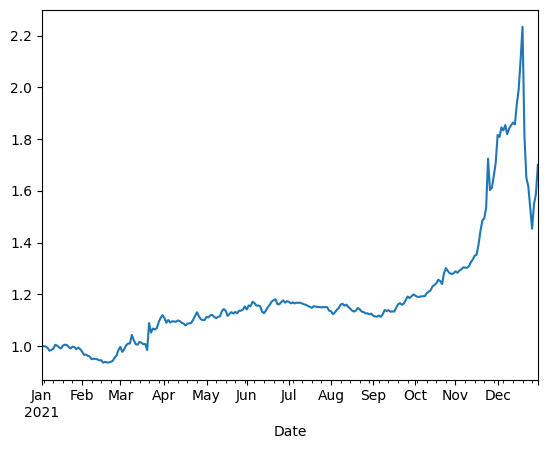

In [10]:
Kur2021["Normalize USD/TRY"].plot()

# *BIST 030 endeksi yılın ilk günü baz alındığında, 2021 yılında Mart ayının sonlarına kadar genellikle 1'in hemen altında seyrederken Mart sonlarından Kasım ayının ortalarına kadar ise 0.86 ile 0.95 değerleri aralığında dalgalanmalar yaşamaktadır. Buradan yükselişe geçen BIST 030 Aralık ayının ortalarına kadar çok hızlı ve istikrarlı bir yükseliş gösterip 1.53 seviyelerini yakalamayı başarmış olmasına rağmen ulaştığı en yüksek noktadan 1 hafta içerisinde çok sert bir düşüş yaparak 1.25 civarlarında dengelenmiştir.*

<Axes: xlabel='Date'>

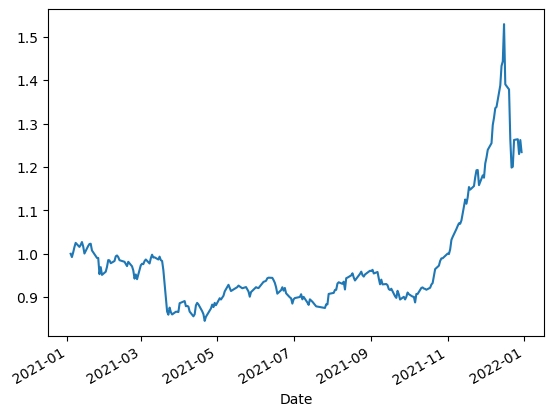

In [9]:
B030_2021["Normalize"].plot()

5. Veriyi grafik olarak inceleyiniz:<br>
	• Tabloyu px grafiği olarak görselleştiriniz.<br>
	• Tabloyu go. grafiği olarak görselleştiriniz.

In [13]:
B030K_2021 = B030_2021.merge(Kur2021, left_index=True, right_index=True)
B030K_2021

,Kapanış (TRY),Normalize,USD/TRY,Normalize USD/TRY
Date,,,,
2021-01-04,1652.900024,1.000000,7.43342,0.999949
2021-01-05,1640.400024,0.992438,7.42150,0.998345
2021-01-06,1657.699951,1.002904,7.38379,0.993273
2021-01-07,1678.199951,1.015306,7.29972,0.981963
2021-01-08,1694.400024,1.025107,7.32660,0.985579
...,...,...,...,...
2021-12-24,2086.800049,1.262508,11.41330,1.535325
2021-12-27,2089.399902,1.264081,10.80707,1.453775
2021-12-28,2032.900024,1.229899,11.52105,1.549820


In [14]:
px.line(B030K_2021, y=["Normalize","Normalize USD/TRY"])

In [26]:
fig = go.Figure()
fig.add_trace(go.Bar(x=B030K_2021.index, y=B030K_2021["Normalize"], name="Normalize BIST 030"))
fig.add_trace(go.Scatter(x=B030K_2021.index, y=B030K_2021["Normalize USD/TRY"], name="Normalize USD/TRY"))

fig.update_layout(title="2021 Yılı Normalize BIST 030 ve Normalize Kur",
                  xaxis_title="Tarih", xaxis_dtick = "M1",
                  yaxis_title="Kapanış (TRY)")

### 2021 ve 2022 değerlerini birlikte inceleme

1. <i> Yahoo Finance</i> sitesinden 2022 BIST30 ve EUR/TRY kur değerlerini indiriniz

In [16]:
B030_2022 = yf.download("XU030.IS", start="2022-01-01", end="2022-12-31")
B030_2022

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2039.099976,2109.500000,2032.300049,2109.500000,2109.500000,1394200
2022-01-04,2128.000000,2176.699951,2109.699951,2157.000000,2157.000000,1969800
2022-01-05,2158.000000,2213.899902,2145.500000,2212.300049,2212.300049,1578300
2022-01-06,2196.500000,2239.300049,2180.399902,2219.600098,2219.600098,2056500
2022-01-07,2235.800049,2260.600098,2206.500000,2256.600098,2256.600098,2517800
...,...,...,...,...,...,...
2022-12-23,5836.899902,5890.700195,5794.600098,5885.200195,5885.200195,2265000
2022-12-27,5943.000000,5969.500000,5870.799805,5876.700195,5876.700195,2288000
2022-12-28,5886.399902,5892.299805,5690.500000,5789.399902,5789.399902,2400800


In [17]:
Kur2022 = yf.download("TRY=X", start="2022-01-01", end="2022-12-31")
Kur2022

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,13.345700,13.879300,12.807200,13.356600,13.356600,0
2022-01-04,13.060000,13.583000,12.960000,13.061700,13.061700,0
2022-01-05,13.418900,13.633900,13.267340,13.411500,13.411500,0
2022-01-06,13.681400,13.870800,13.465500,13.688000,13.688000,0
2022-01-07,13.804000,13.916300,13.704620,13.782100,13.782100,0
...,...,...,...,...,...,...
2022-12-26,18.623430,18.712400,18.578159,18.623430,18.623430,0
2022-12-27,18.656799,18.793501,18.573200,18.656799,18.656799,0
2022-12-28,18.657000,18.734501,18.619370,18.657000,18.657000,0


2. Indirdiğiniz verileri 2021 verilerini temizleyip düzenlediğiniz üzere hazırlayınız.

In [18]:
B030_2022 = B030_2022[["Adj Close"]]
B030_2022.columns = ["Kapanış (TRY)"]
B030_2022["Normalize"] = B030_2022["Kapanış (TRY)"]/B030_2022.iloc[0,0]
B030_2022

<ipython-input-18-55194d0454bf>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Kapanış (TRY),Normalize
Date,,
2022-01-03,2109.500000,1.000000
2022-01-04,2157.000000,1.022517
2022-01-05,2212.300049,1.048732
2022-01-06,2219.600098,1.052193
2022-01-07,2256.600098,1.069732
...,...,...
2022-12-23,5885.200195,2.789856
2022-12-27,5876.700195,2.785826
2022-12-28,5789.399902,2.744442


In [19]:
Kur2022 = Kur2022[["Adj Close"]]
Kur2022.columns = ["USD/TRY"]
Kur2022["Normalize USD/TRY"] = Kur2022["USD/TRY"]/Kur2022.iloc[0,0]
Kur2022

<ipython-input-19-31a752201d84>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,USD/TRY,Normalize USD/TRY
Date,,
2022-01-03,13.356600,1.000000
2022-01-04,13.061700,0.977921
2022-01-05,13.411500,1.004110
2022-01-06,13.688000,1.024812
2022-01-07,13.782100,1.031857
...,...,...
2022-12-26,18.623430,1.394324
2022-12-27,18.656799,1.396823
2022-12-28,18.657000,1.396838


In [20]:
B030K_2022 = B030_2022.merge(Kur2022, left_index=True, right_index=True)
B030K_2022

,Kapanış (TRY),Normalize,USD/TRY,Normalize USD/TRY
Date,,,,
2022-01-03,2109.500000,1.000000,13.356600,1.000000
2022-01-04,2157.000000,1.022517,13.061700,0.977921
2022-01-05,2212.300049,1.048732,13.411500,1.004110
2022-01-06,2219.600098,1.052193,13.688000,1.024812
2022-01-07,2256.600098,1.069732,13.782100,1.031857
...,...,...,...,...
2022-12-23,5885.200195,2.789856,18.669630,1.397783
2022-12-27,5876.700195,2.785826,18.656799,1.396823
2022-12-28,5789.399902,2.744442,18.657000,1.396838


3. 2021 ve 2022 veri tablolarını tek bir tablo haline getiriniz.

In [22]:
B030K = pd.concat([B030K_2021, B030K_2022], axis=0)
B030K

,Kapanış (TRY),Normalize,USD/TRY,Normalize USD/TRY
Date,,,,
2021-01-04,1652.900024,1.000000,7.433420,0.999949
2021-01-05,1640.400024,0.992438,7.421500,0.998345
2021-01-06,1657.699951,1.002904,7.383790,0.993273
2021-01-07,1678.199951,1.015306,7.299720,0.981963
2021-01-08,1694.400024,1.025107,7.326600,0.985579
...,...,...,...,...
2022-12-23,5885.200195,2.789856,18.669630,1.397783
2022-12-27,5876.700195,2.785826,18.656799,1.396823
2022-12-28,5789.399902,2.744442,18.657000,1.396838


4. Veriyi grafik olarak inceleyiniz:<br>
	• Tabloları px grafiği olarak görselleştiriniz.<br>
	• Tabloları go. grafiği olarak görselleştiriniz.<br>
	• Tabloları subplots grafiği olarak görselleştiriniz.

In [23]:
px.line(B030K, y=["Normalize","Normalize USD/TRY"])

In [29]:
fig = go.Figure()
fig.add_trace(go.Bar(x=B030K.index, y=B030K["Normalize"], name="Normalize BIST 030"))
fig.add_trace(go.Scatter(x=B030K.index, y=B030K["Normalize USD/TRY"], name="Normalize USD/TRY"))

fig.update_layout(title="Normalize BIST 030 ve Normalize Kur",
                  xaxis_title="Tarih", xaxis_dtick = "M1",
                  yaxis_title="Kapanış (TRY)")

In [30]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=B030K.index, y=B030K["Normalize"], name="Normalize BIST 030"), row=1, col=1)
fig.add_trace(go.Scatter(x=B030K.index, y=B030K["Normalize USD/TRY"], name="Normalize USD/TRY"), row=1, col=2)

fig.update_layout(title="Normalize BIST 030 ve Normalize Kur",
                  xaxis_title="Tarih", xaxis_dtick = "M1",
                  yaxis_title="Kapanış (TRY)")